<a href="https://colab.research.google.com/github/kailasmanoj03/Lung-Cancer-Prediction-using-KNN/blob/main/Lung_Cancer_Prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('/content/lung_cancer_examples.csv')

In [48]:
df.shape

(59, 7)

In [49]:
df["Age"]

,Age
0,35
1,27
2,30
3,28
4,68
5,34
6,58
7,22
8,45
9,52


In [5]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [9]:
df.isna().sum()

,0
Name,0
Surname,0
Age,0
Smokes,0
AreaQ,0
Alkhol,0
Result,0


Splitting into X and y

In [22]:
X = df.iloc[:,2:6].values
y = df.iloc[:,-1].values

In [23]:
X

array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


In [24]:
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

Scaling X_train and X_test

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using KNN for prediction

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

Accuracy

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.9444444444444444

In [40]:
accuracy_score(y_test,y_pred)*100 # in percent

94.44444444444444

Confusion Matrix for accuracy

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

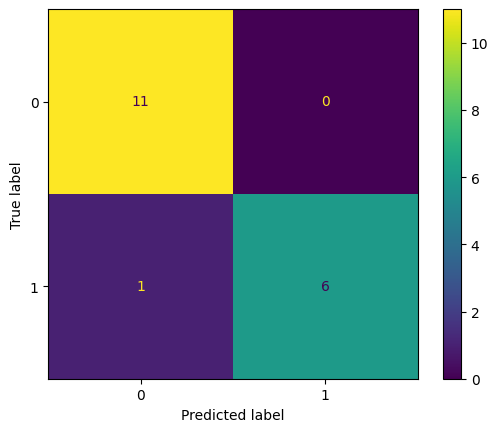

In [37]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [44]:
knn.predict(sc.transform([[25,1,3,4]]))

array([0])